# Regression and Model Trees

#### *Strengths*

**1)** Combines the strengths of decision trees with the ability to model numeric data 

**2)** Does automatic feature selection, which allows the approach to be used with a very large number of features 

**3)** Does not require the user to specify the model in advance 

**4)** May fit some types of data much better than linear regression 

**5)** Does not require knowledge of statistics to interpret the model

#### *Weaknesses*

**1)** Not as commonly-used as linear regression 

**2)**Requires a large amount of training data 

**3)** Difficult to determine the overall net effect of individual features on the outcome 

**4)** May be more difficult to interpret than a regression model


SDR (Standard Deviation Reduction) : 

    original data       1, 1, 1, 2, 2, 3, 4, 5, 5, 6, 6, 7, 7, 7, 7

    split on feature A  1, 1, 1, 2, 2, 3, 4, 5, 5 | 6, 6, 7, 7, 7, 7

    split on feature B  1, 1, 1, 2, 2, 3, 4 | 5, 5, 6, 6, 7, 7, 7, 7

In [1]:
tee <- c(1, 1, 1, 2, 2, 3, 4, 5, 5, 6, 6, 7, 7, 7, 7) 
at1 <- c(1, 1, 1, 2, 2, 3, 4, 5, 5)
at2 <- c(6, 6, 7, 7, 7, 7)
bt1 <- c(1, 1, 1, 2, 2, 3, 4)
bt2 <- c(5, 5, 6, 6, 7, 7, 7, 7)

In [2]:
sdr_a <- sd(tee) - (length(at1) / length(tee) * sd(at1) + length(at2) / length(tee) * sd(at2))

In [3]:
sdr_b <- sd(tee) - (length(bt1) / length(tee) * sd(bt1) + length(bt2) / length(tee) * sd(bt2))

In [4]:
sdr_a; sdr_b

[1] 1.202815

[1] 1.392751

In [5]:
mean(bt1); mean(bt2)

[1] 2

[1] 6.25

## Quality of wines example using regression trees and model trees

### Step One: Collect Data

In [6]:
wine <- read.csv("../csv/whitewines.csv")

### Step Two: Explore and Prepare the Data

In [7]:
str(wine)

'data.frame':	4898 obs. of  12 variables:
 $ fixed.acidity       : num  7 6.3 8.1 7.2 7.2 8.1 6.2 7 6.3 8.1 ...
 $ volatile.acidity    : num  0.27 0.3 0.28 0.23 0.23 0.28 0.32 0.27 0.3 0.22 ...
 $ citric.acid         : num  0.36 0.34 0.4 0.32 0.32 0.4 0.16 0.36 0.34 0.43 ...
 $ residual.sugar      : num  20.7 1.6 6.9 8.5 8.5 6.9 7 20.7 1.6 1.5 ...
 $ chlorides           : num  0.045 0.049 0.05 0.058 0.058 0.05 0.045 0.045 0.049 0.044 ...
 $ free.sulfur.dioxide : num  45 14 30 47 47 30 30 45 14 28 ...
 $ total.sulfur.dioxide: num  170 132 97 186 186 97 136 170 132 129 ...
 $ density             : num  1.001 0.994 0.995 0.996 0.996 ...
 $ pH                  : num  3 3.3 3.26 3.19 3.19 3.26 3.18 3 3.3 3.22 ...
 $ sulphates           : num  0.45 0.49 0.44 0.4 0.4 0.44 0.47 0.45 0.49 0.45 ...
 $ alcohol             : num  8.8 9.5 10.1 9.9 9.9 10.1 9.6 8.8 9.5 11 ...
 $ quality             : int  6 6 6 6 6 6 6 6 6 6 ...


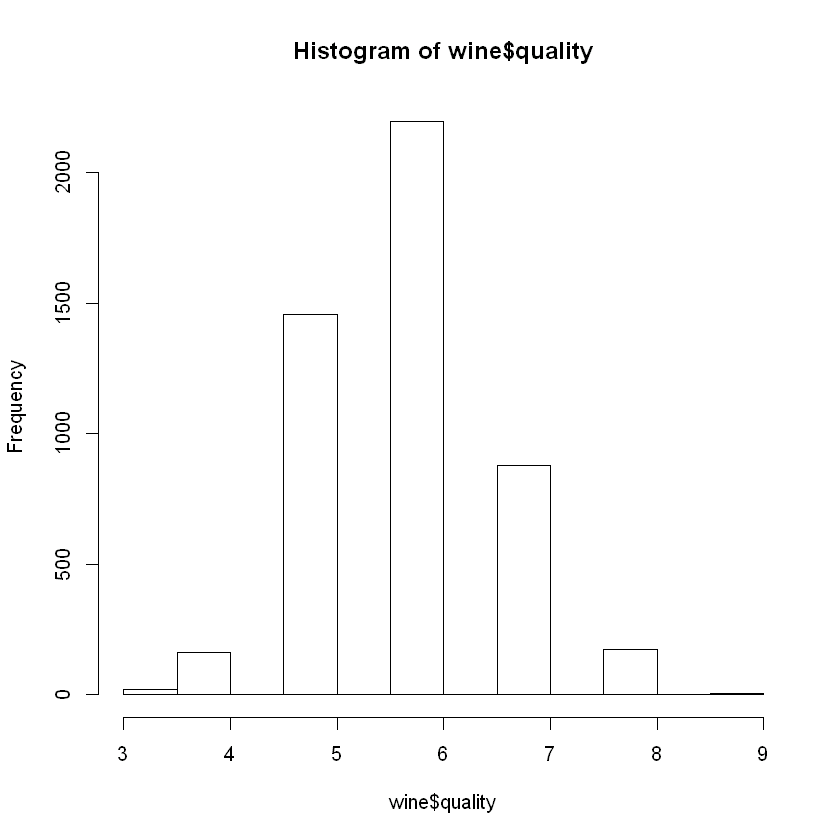

In [8]:
hist(wine$quality)

In [9]:
summary(wine)

 fixed.acidity    volatile.acidity  citric.acid     residual.sugar  
 Min.   : 3.800   Min.   :0.0800   Min.   :0.0000   Min.   : 0.600  
 1st Qu.: 6.300   1st Qu.:0.2100   1st Qu.:0.2700   1st Qu.: 1.700  
 Median : 6.800   Median :0.2600   Median :0.3200   Median : 5.200  
 Mean   : 6.855   Mean   :0.2782   Mean   :0.3342   Mean   : 6.391  
 3rd Qu.: 7.300   3rd Qu.:0.3200   3rd Qu.:0.3900   3rd Qu.: 9.900  
 Max.   :14.200   Max.   :1.1000   Max.   :1.6600   Max.   :65.800  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.00900   Min.   :  2.00      Min.   :  9.0        Min.   :0.9871  
 1st Qu.:0.03600   1st Qu.: 23.00      1st Qu.:108.0        1st Qu.:0.9917  
 Median :0.04300   Median : 34.00      Median :134.0        Median :0.9937  
 Mean   :0.04577   Mean   : 35.31      Mean   :138.4        Mean   :0.9940  
 3rd Qu.:0.05000   3rd Qu.: 46.00      3rd Qu.:167.0        3rd Qu.:0.9961  
 Max.   :0.34600   Max.   :289.00      Max.   :440.0   

In [10]:
wine_train <- wine[1:3750, ]
wine_test <- wine[3751:4898, ]

### Step Three: Training the Model on Data

In [11]:
install.packages("rpart", repo = "https://cran.r-project.org")

package 'rpart' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Bradley Bailey\AppData\Local\Temp\RtmpcTfSaj\downloaded_packages


In [12]:
library(rpart)

Warning message:
: package 'rpart' was built under R version 3.2.5

In [13]:
m_rpart <- rpart(quality ~ ., data = wine_train)

In [14]:
m_rpart

n= 3750 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 3750 3140.06000 5.886933  
   2) alcohol< 10.85 2473 1510.66200 5.609381  
     4) volatile.acidity>=0.2425 1406  740.15080 5.402560  
       8) volatile.acidity>=0.4225 182   92.99451 4.994505 *
       9) volatile.acidity< 0.4225 1224  612.34560 5.463235 *
     5) volatile.acidity< 0.2425 1067  631.12090 5.881912 *
   3) alcohol>=10.85 1277 1069.95800 6.424432  
     6) free.sulfur.dioxide< 11.5 93   99.18280 5.473118 *
     7) free.sulfur.dioxide>=11.5 1184  879.99920 6.499155  
      14) alcohol< 11.85 611  447.38130 6.296236 *
      15) alcohol>=11.85 573  380.63180 6.715532 *

In [15]:
summary(m_rpart)

Call:
rpart(formula = quality ~ ., data = wine_train)
  n= 3750 

          CP nsplit rel error    xerror       xstd
1 0.17816211      0 1.0000000 1.0005049 0.02388753
2 0.04439109      1 0.8218379 0.8229047 0.02239326
3 0.02890893      2 0.7774468 0.7876897 0.02222261
4 0.01655575      3 0.7485379 0.7606073 0.02107842
5 0.01108600      4 0.7319821 0.7479817 0.02059888
6 0.01000000      5 0.7208961 0.7410620 0.02031009

Variable importance
             alcohol              density            chlorides 
                  38                   23                   12 
    volatile.acidity total.sulfur.dioxide  free.sulfur.dioxide 
                  12                    7                    6 
           sulphates                   pH       residual.sugar 
                   1                    1                    1 

Node number 1: 3750 observations,    complexity param=0.1781621
  mean=5.886933, MSE=0.8373493 
  left son=2 (2473 obs) right son=3 (1277 obs)
  Primary splits:
      alco

In [16]:
install.packages('rpart.plot', repo = "https://cran.r-project.org")

package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Bradley Bailey\AppData\Local\Temp\RtmpcTfSaj\downloaded_packages


In [17]:
library(rpart.plot)

Warning message:
: package 'rpart.plot' was built under R version 3.2.5

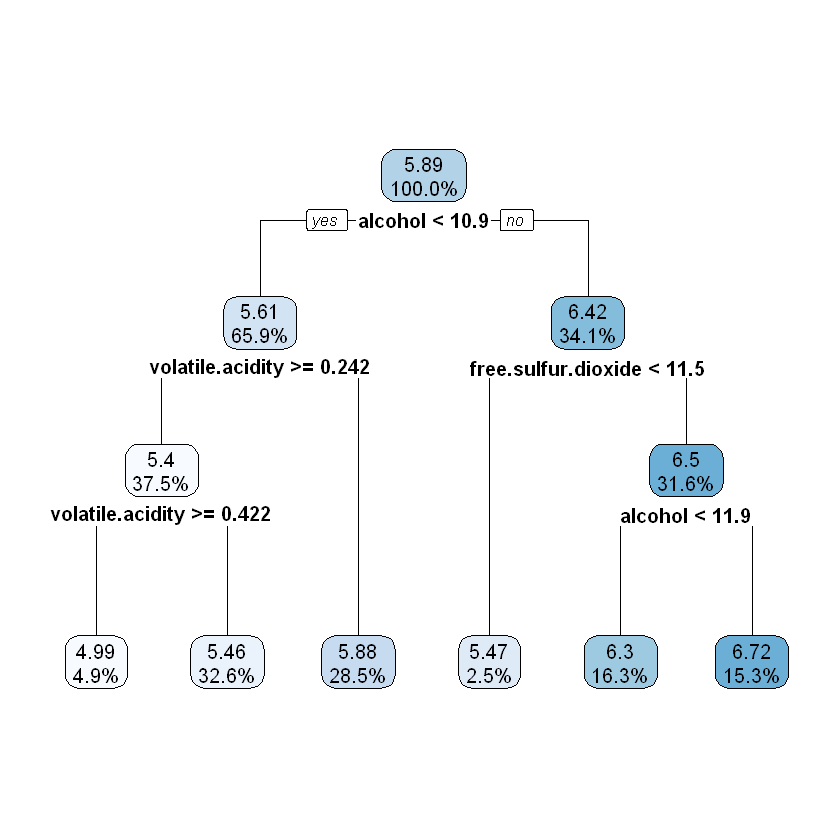

In [34]:
rpart.plot(m_rpart, digits = 3)

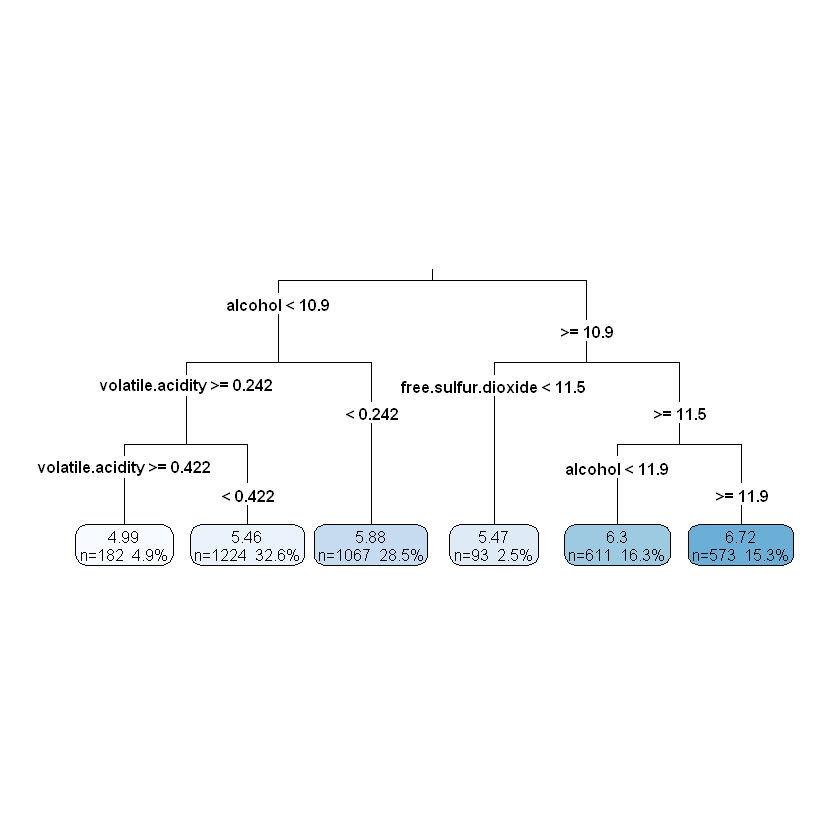

In [33]:
rpart.plot(m_rpart, digits = 3, type = 3, extra = 101)

### Step Four: Evaluating Performance

In [35]:
p.rpart <- predict(m_rpart, wine_test)

In [36]:
summary(p.rpart)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.995   5.463   5.882   5.999   6.296   6.716 

In [37]:
summary(wine_test$quality)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   5.000   6.000   5.848   6.000   8.000 

This shows that the extreme cases aren't being identified well but the cases between the 1st and 3rd quartile may be doing well

In [38]:
cor(p.rpart, wine_test$quality)

[1] 0.4931608

Mean Absolute Value to check for model's performance

In [39]:
MAE <- function(actual, predicted) { 
    mean(abs(actual - predicted))
}

In [41]:
MAE(p.rpart, wine_test$quality)

[1] 0.5732104

In [42]:
mean(wine_test$quality)

[1] 5.848432

### Step Five: Improving Model's Performance

In [44]:
library(RWeka)

Warning message:
: package 'RWeka' was built under R version 3.2.5

In [45]:
m.m5p <- M5P(quality ~ ., data = wine_train) 

In [46]:
m.m5p

M5 pruned model tree:
(using smoothed linear models)

alcohol <= 10.85 : LM1 (2473/77.476%)
alcohol >  10.85 : 
|   free.sulfur.dioxide <= 20.5 : 
|   |   free.sulfur.dioxide <= 10.5 : LM2 (81/104.574%)
|   |   free.sulfur.dioxide >  10.5 : LM3 (224/87.002%)
|   free.sulfur.dioxide >  20.5 : LM4 (972/84.073%)

LM num: 1
quality = 
	0.0777 * fixed.acidity 
	- 2.3087 * volatile.acidity 
	+ 0.0732 * residual.sugar 
	+ 0.0022 * free.sulfur.dioxide 
	- 155.0175 * density 
	+ 0.6462 * pH 
	+ 0.7923 * sulphates 
	+ 0.0758 * alcohol 
	+ 156.2102

LM num: 2
quality = 
	-0.0314 * fixed.acidity 
	- 0.3415 * volatile.acidity 
	+ 1.7929 * citric.acid 
	+ 0.1316 * residual.sugar 
	- 0.2456 * chlorides 
	+ 0.1212 * free.sulfur.dioxide 
	- 178.6281 * density 
	+ 0.054 * pH 
	+ 0.1392 * sulphates 
	+ 0.0108 * alcohol 
	+ 180.6069

LM num: 3
quality = 
	-0.2019 * fixed.acidity 
	- 2.3804 * volatile.acidity 
	- 1.0851 * citric.acid 
	+ 0.0905 * residual.sugar 
	- 0.2456 * chlorides 
	+ 0.0041 * free.sulf

In [47]:
summary(m.m5p)


=== Summary ===

Correlation coefficient                  0.5932
Mean absolute error                      0.5804
Root mean squared error                  0.7367
Relative absolute error                 83.3671 %
Root relative squared error             80.507  %
Total Number of Instances             3750     

In [48]:
p.m5p <- predict(m.m5p, wine_test) 

In [49]:
summary(p.m5p)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.170   5.646   6.032   6.079   6.501   7.913 

In [50]:
 cor(p.m5p, wine_test$quality) 

[1] 0.531723

In [51]:
MAE(wine_test$quality, p.m5p)

[1] 0.5660352